In [70]:
import pandas as pd
import gzip
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter
from matplotlib.animation import FFMpegWriter

In [99]:
# File paths
locust_file_path = '/Users/apaula/src/VRDataAnalysis/SimulatedLocustSwarm/data/20230915rundata/RunData/20230914202153/2023-09-14_20-21-53_VR1_.csv.gz'
environment_file_path = '/Users/apaula/src/VRDataAnalysis/SimulatedLocustSwarm/data/20230915rundata/RunData/20230914202153/SimulatedLocustData_SimulatedLocustsVR1_50_100_0_0_3_2023-09-14_20-21-53.csv.gz'

#locust_file_path = '/Users/apaula/src/VRDataAnalysis/SimulatedLocustSwarm/data/20230915rundata/RunData/20230914202522/2023-09-14_20-25-22_VR1_.csv.gz'
#environment_file_path = '/Users/apaula/src/VRDataAnalysis/SimulatedLocustSwarm/data/20230915rundata/RunData/20230914202522/SimulatedLocustData_SimulatedLocustsVR1_50_100_180_10000_3_2023-09-14_20-25-22.csv.gz'

locust_file_path = '/Users/apaula/src/VRDataAnalysis/SimulatedLocustSwarm/data/20230915rundata/RunData/20230914203959/2023-09-14_20-39-59_VR1_.csv.gz'
environment_file_path = '/Users/apaula/src/VRDataAnalysis/SimulatedLocustSwarm/data/20230915rundata/RunData/20230914203959/SimulatedLocustData_SimulatedLocustsVR1_50_100_0_10000_3_2023-09-14_20-39-59.csv.gz'

locust_file_path = '/Users/apaula/src/VRDataAnalysis/SimulatedLocustSwarm/data/20230915rundata/RunData/20230914204159/2023-09-14_20-41-59_VR1_.csv.gz'
environment_file_path = '/Users/apaula/src/VRDataAnalysis/SimulatedLocustSwarm/data/20230915rundata/RunData/20230914204159/SimulatedLocustData_SimulatedLocustsVR1_50_100_0_0_3_2023-09-14_20-41-59.csv.gz'
# Load the locust data
with gzip.open(locust_file_path, 'rb') as f:
    locust_df = pd.read_csv(f)

# Load the environment data
with gzip.open(environment_file_path, 'rb') as f:
    environment_df = pd.read_csv(f)

# Show first few rows of each dataframe
locust_df.head(), environment_df.head()


(              Current Time   VR             Scene  SensPosX  SensPosY  \
 0  2023-09-14 20:41:59.788  VR1  SimulatedLocusts   0.00000  0.000000   
 1  2023-09-14 20:41:59.804  VR1  SimulatedLocusts -13.23665 -7.183510   
 2  2023-09-14 20:41:59.820  VR1  SimulatedLocusts -13.23889 -7.184957   
 3  2023-09-14 20:41:59.838  VR1  SimulatedLocusts -13.23677 -7.181470   
 4  2023-09-14 20:41:59.854  VR1  SimulatedLocusts -13.23773 -7.183874   
 
    SensPosZ  SensRotX  SensRotY  SensRotZ  InsectPosX  InsectPosY  InsectPosZ  \
 0         0         0    0.0000         0    0.000000           0     0.00000   
 1         0         0  134.0519         0   -7.183510           0   -13.23665   
 2         0         0  133.9024         0   -7.184957           0   -13.23889   
 3         0         0  134.0373         0   -7.181470           0   -13.23677   
 4         0         0  134.0136         0   -7.183874           0   -13.23773   
 
    InsectRotX  InsectRotY  InsectRotZ  
 0           0     

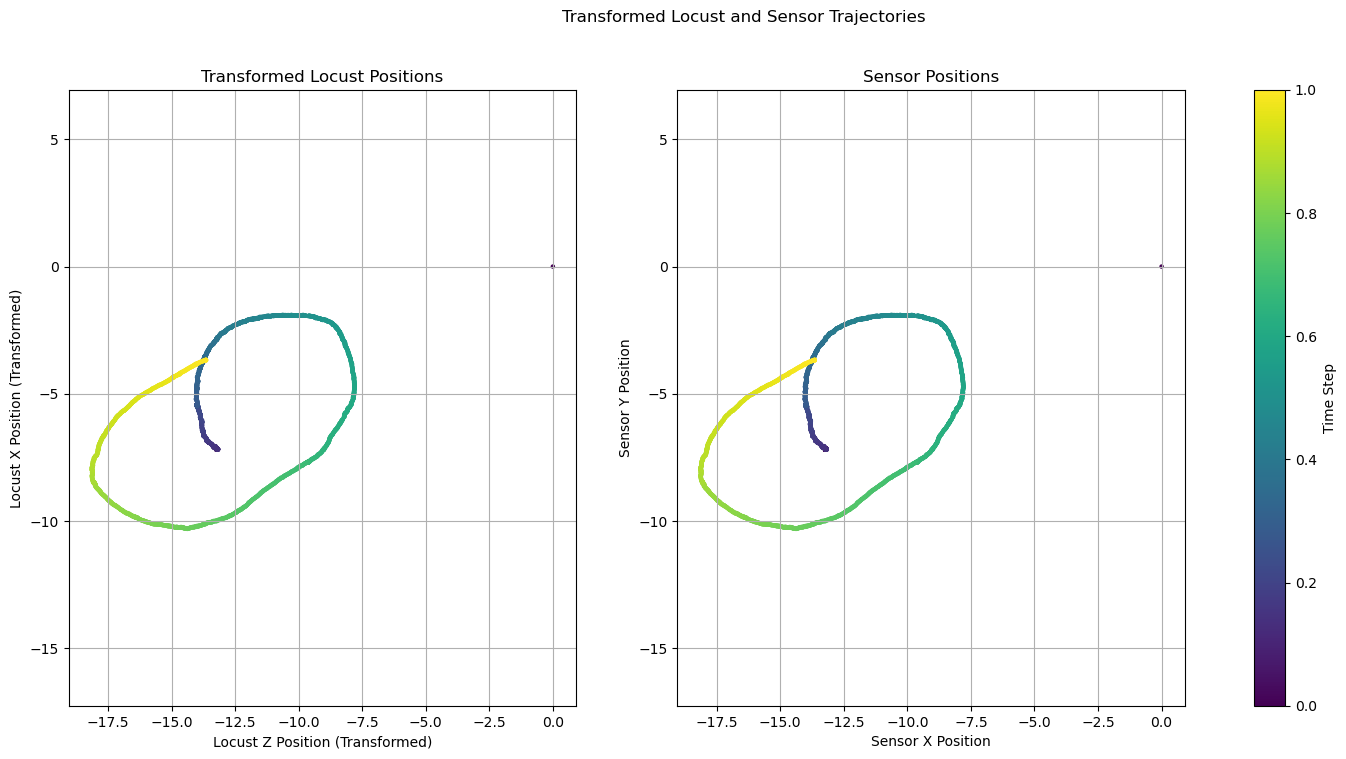

In [100]:
# Creating subplots for locust and sensor trajectories with corrected axes
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Subplot for Transformed Locust Positions (InsectPosZ and InsectPosX)
axes[0].scatter(locust_df['InsectPosZ'], locust_df['InsectPosX'], c=range(len(locust_df)), cmap='viridis', s=5)
axes[0].set_title('Transformed Locust Positions')
axes[0].set_xlabel('Locust Z Position (Transformed)')
axes[0].set_ylabel('Locust X Position (Transformed)')
axes[0].axis('equal')
axes[0].grid(True)

# Subplot for Sensor Positions (SensPosX and SensPosY)
axes[1].scatter(locust_df['SensPosX'], locust_df['SensPosY'], c=range(len(locust_df)), cmap='viridis', s=5)
axes[1].set_title('Sensor Positions')
axes[1].set_xlabel('Sensor X Position')
axes[1].set_ylabel('Sensor Y Position')
axes[1].axis('equal')
axes[1].grid(True)

# Adding colorbar and overall title
fig.colorbar(plt.cm.ScalarMappable(cmap='viridis'), ax=axes.ravel().tolist(), label='Time Step')
fig.suptitle('Transformed Locust and Sensor Trajectories')

plt.show()


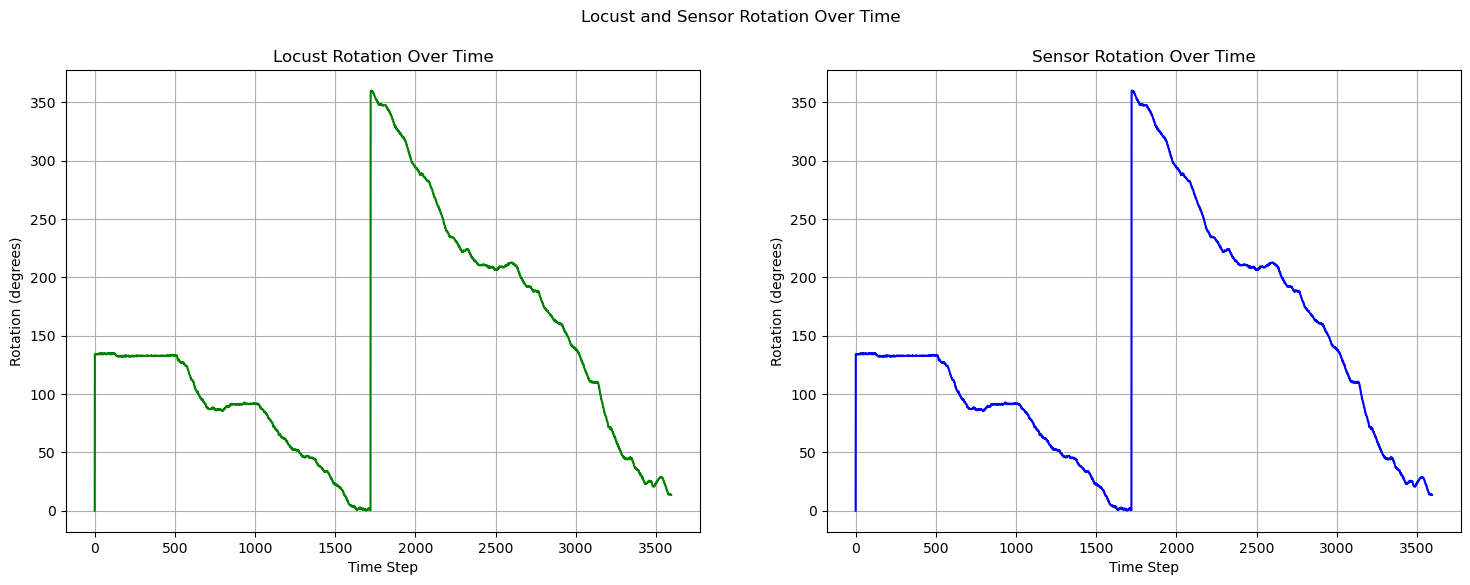

In [101]:
# Creating subplots for locust and sensor rotation over time
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Time index
time_index = range(len(locust_df))

# Subplot for Locust Rotation (InsectRotY)
axes[0].plot(time_index, locust_df['InsectRotY'], color='green', label='Insect Rotation (Y-axis)')
axes[0].set_title('Locust Rotation Over Time')
axes[0].set_xlabel('Time Step')
axes[0].set_ylabel('Rotation (degrees)')
axes[0].grid(True)

# Subplot for Sensor Rotation (SensRotY)
axes[1].plot(time_index, locust_df['SensRotY'], color='blue', label='Sensor Rotation (Y-axis)')
axes[1].set_title('Sensor Rotation Over Time')
axes[1].set_xlabel('Time Step')
axes[1].set_ylabel('Rotation (degrees)')
axes[1].grid(True)

# Adding overall title
fig.suptitle('Locust and Sensor Rotation Over Time')

plt.show()

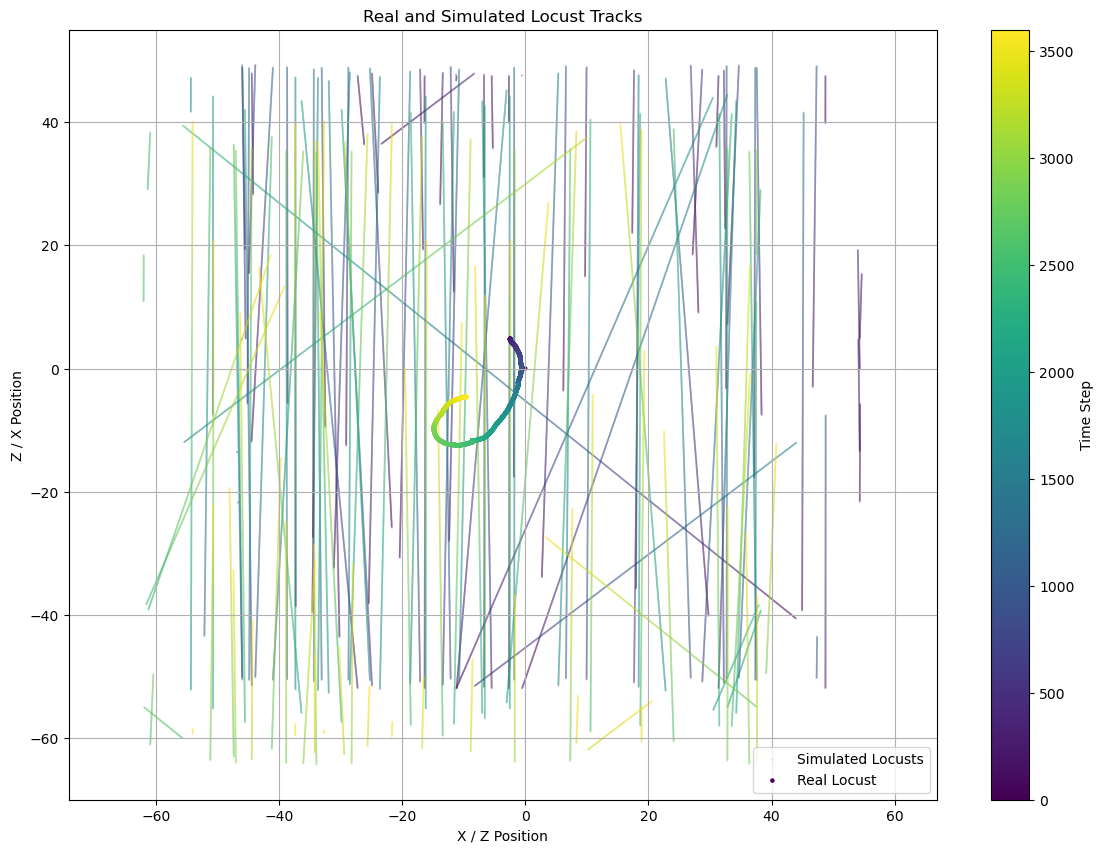

In [95]:
# First, plot the simulated locust positions
plt.figure(figsize=(14, 10))
plt.scatter(environment_df['X'], environment_df['Z'], c=range(len(environment_df)), cmap='viridis', s=0.1, label='Simulated Locusts', alpha = 0.2)

# Next, overlay the real locust trajectory
plt.scatter(locust_df['InsectPosZ'], locust_df['InsectPosX'], c=range(len(locust_df)), cmap='viridis', s=5, label='Real Locust')

# Add colorbar, labels, and title
plt.colorbar(label='Time Step')
plt.title('Real and Simulated Locust Tracks')
plt.xlabel('X / Z Position')
plt.ylabel('Z / X Position')
plt.grid(True)
plt.legend()

plt.axis('equal')

# Show the plot
plt.show()


In [97]:
# Calculate the differences in x and z positions
dx = locust_df['InsectPosZ'].diff()
dz = locust_df['InsectPosX'].diff()

# Calculate the time difference (assuming constant time step)

# Convert 'Current Time' to datetime format
locust_df['Current Time'] = pd.to_datetime(locust_df['Current Time'])

# Calculate the time difference in seconds
locust_df['dt'] = locust_df['Current Time'].diff().dt.total_seconds()

# Calculate speed
locust_df['Speed'] = np.sqrt(dx**2 + dz**2) / locust_df['dt']

# Apply a moving average to smooth the speed data (window size = 5)
locust_df['Smoothed_Speed'] = locust_df['Speed'].rolling(window=5).mean()

# Set a speed threshold for classifying as moving or standing (e.g., 0.01)
speed_threshold = 0.01

# Classify behavior
locust_df['Behavior'] = np.where(locust_df['Smoothed_Speed'] > speed_threshold, 'Moving', 'Standing')


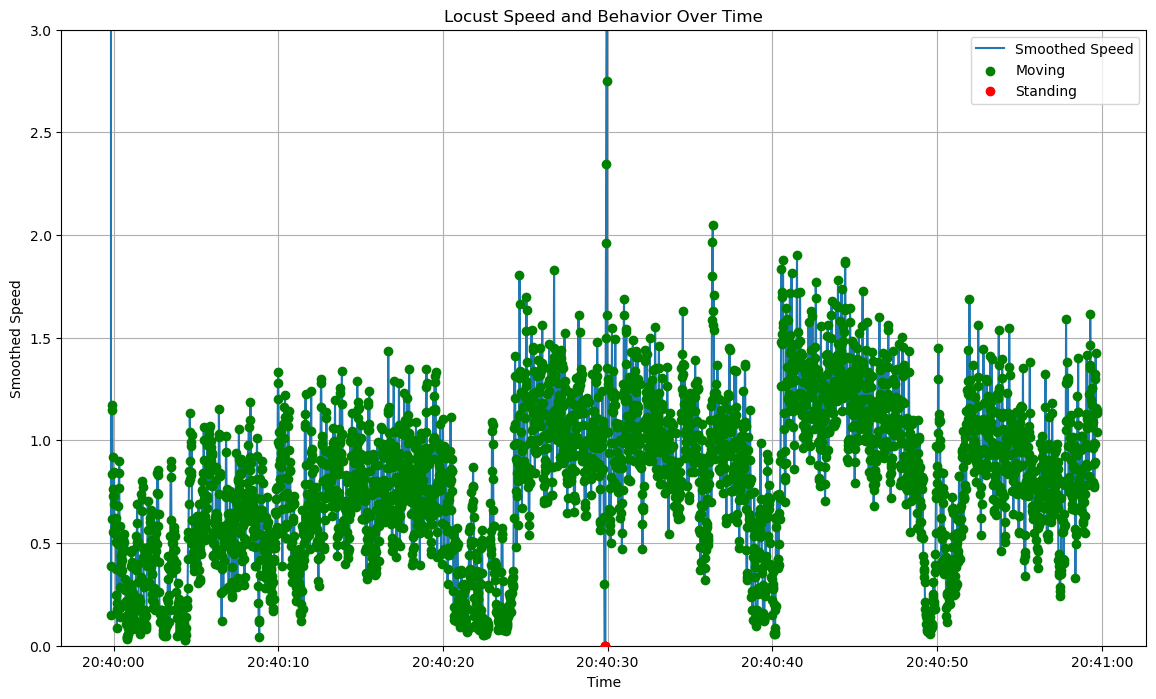

In [98]:
# Create a plot
plt.figure(figsize=(14, 8))

# Plot speed over time
plt.plot(locust_df['Current Time'], locust_df['Smoothed_Speed'], label='Smoothed Speed')

# Highlight points where the locust is moving
plt.scatter(locust_df['Current Time'][locust_df['Behavior'] == 'Moving'], 
            locust_df['Smoothed_Speed'][locust_df['Behavior'] == 'Moving'], 
            color='g', label='Moving', zorder=5)

# Highlight points where the locust is standing
plt.scatter(locust_df['Current Time'][locust_df['Behavior'] == 'Standing'], 
            locust_df['Smoothed_Speed'][locust_df['Behavior'] == 'Standing'], 
            color='r', label='Standing', zorder=5)

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Smoothed Speed')
plt.title('Locust Speed and Behavior Over Time')
plt.legend()
plt.grid(True)
plt.ylim([0,3])
# Show the plot
plt.show()


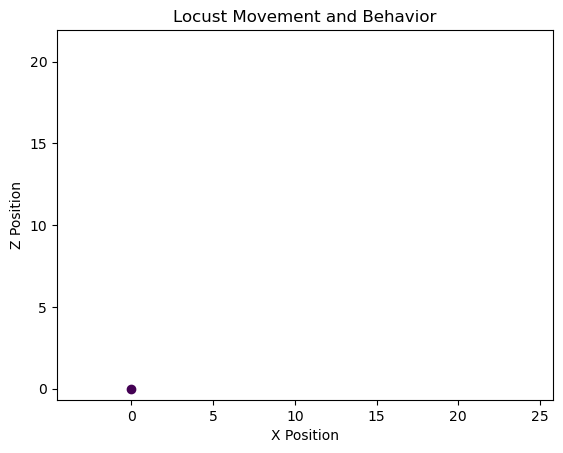

In [91]:
# Create a plot
fig, ax = plt.subplots()

# Initialize the scatter plot
sc = ax.scatter([], [], c=[])

# Set axis labels and title
ax.set_xlabel('X Position')
ax.set_ylabel('Z Position')
ax.set_title('Locust Movement and Behavior')


def animate(i):
    """Update the scatter plot for each frame."""
    data = locust_df.iloc[:i*10+1]
    x = data['InsectPosZ']
    z = data['InsectPosX']
    color = [1 if behavior == 'Moving' else 0 for behavior in data['Behavior']]
    sc.set_offsets(np.c_[x, z])
    sc.set_array(color)

# Compute the limits
x_min, x_max = locust_df['InsectPosZ'].min(), locust_df['InsectPosZ'].max()
z_min, z_max = locust_df['InsectPosX'].min(), locust_df['InsectPosX'].max()

# Set axis limits
ax.set_xlim(min(x_min, z_min), max(x_max, z_max))
ax.set_ylim(min(x_min, z_min), max(x_max, z_max))

# Ensure that both x and y axis scales are equal
ax.axis('equal')
# Create animation
ani = FuncAnimation(fig, animate, frames=(len(locust_df)//10), interval=50)

# Create a writer object
writer = FFMpegWriter(fps=20)

# Save the animation
ani.save("locust_behavior.mp4", writer=writer)